In [327]:
import pandas as pd

In [328]:
# Load fx data
data = pd.read_csv('C:/Users/Shree/PycharmProjects/FxPrediction/EUR_USD Historical Data.csv')
del data['Open']
del data['High']
del data['Low']
del data['Change %']
#data = data.tail(60)

In [329]:
#divide into train and validation set
train = data[:int(0.7*(len(data)))]
valid = data[int(0.7*(len(data))):]

In [330]:
#preprocessing (since arima takes univariate series as input)
train.drop('Date',axis=1,inplace=True)
valid.drop('Date',axis=1,inplace=True)

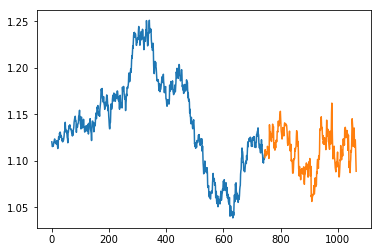

In [331]:
#plotting the data
import matplotlib.pyplot as plt
plt.plot(train['Price'])
plt.plot(valid['Price'])

In [332]:
#building the model
#from pyramid.arima import auto_arima
from pmdarima import auto_arima

In [361]:
#train['Change %'] = train['Change %'].str.replace('%', '').astype('float')

In [362]:
#train

In [363]:
#building the model
from pmdarima import auto_arima

In [364]:
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=-5765.355, BIC=-5737.683, Fit time=0.772 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-5771.614, BIC=-5762.390, Fit time=0.270 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-5771.347, BIC=-5757.511, Fit time=0.395 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-5771.329, BIC=-5757.493, Fit time=0.995 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-5769.357, BIC=-5750.909, Fit time=0.405 seconds
Total fit time: 2.848 seconds


In [365]:
model.fit(train)

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(0, 1, 0),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 0, 0, 1), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend=None,
   with_intercept=True)

In [366]:
forecast = model.predict(n_periods=len(valid))

In [372]:
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

In [373]:
forecast

,Prediction
745,1.107382
746,1.107365
747,1.107347
748,1.107330
749,1.107312
750,1.107295
751,1.107277
752,1.107260
753,1.107242
754,1.107225


In [374]:
valid

,Price
745,1.1036
746,1.1120
747,1.1090
748,1.1059
749,1.1058
750,1.1055
751,1.1063
752,1.1099
753,1.1076
754,1.1156


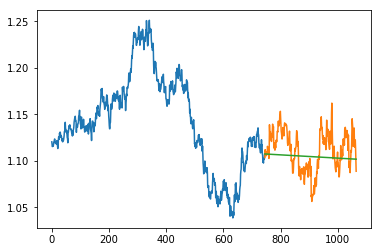

In [375]:
#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

In [376]:
#calculate rmse
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(valid,forecast))
print(rms)

0.021450152231962293
